# Lab 5 - Image Restoration

## Goal: Introduction to image restoration

Import the necessary libraries

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform,io,util,img_as_float
from skimage import restoration
import cv2
from skimage.util import random_noise

Load image and add blurring and noise:

In [2]:
# The function return two images: a blurred image 
# and an image after blurring and noise adding
def AddBlurreAndNoise(img, filter_blur):
    kernel_matrix = np.ones((5,5), np.float64)/25
    img_blurre=cv2.filter2D(img, -1, kernel_matrix)
    img_blurre_noise = random_noise(img_blurre)
    
    return img_blurre, img_blurre_noise
    

Image shape:(512L, 512L), Image data type:uint8


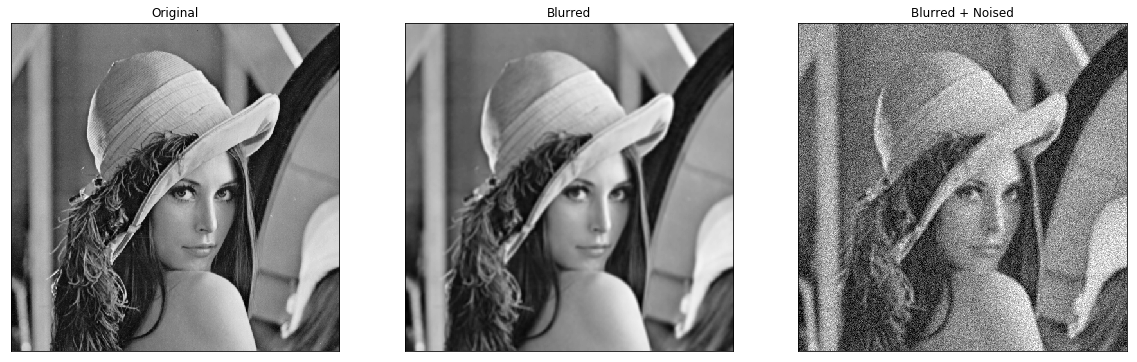

In [5]:
img = io.imread('lena.gif')
#gray_messi_image = color.rgb2gray(messi_image)
#img = gray_messi_image
#img = img_as_float(img)
print ("Image shape:{}, Image data type:{}".format(img.shape,img.dtype))
# Use gaussian kernel for burring the image
# gaussian kernel is separable function
filter_blur = cv2.getGaussianKernel(ksize=5,sigma=1.85)*cv2.getGaussianKernel(ksize=5,sigma=1.85).T 

blurred, noise = AddBlurreAndNoise(img,filter_blur)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(blurred, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(noise, cmap='gray'),plt.title('Blurred + Noised')
plt.xticks([]), plt.yticks([])
plt.show()

###  Part 1 - Inverse Filter

1. Test the restoration with the Inverse Filter for deblurring and denoising

In [0]:
def InvertFilter(noise_img,filter_blur):
    # Paste your implementaion of Inverse Filter here
    [m,n]=noise_img.shape
    
    #we know H, and find its inverse
    H=np.fft.fft2(filter_blur,s=[m,n])
    InverseH=1/H
    
    #find the spectrum of the noise
    noisefft=np.fft.fft2(noise_img)
    
    #calculate the transformed picture, after using the inverse filter
    img_after_inverse_filter=InverseH*noisefft
    return np.abs(np.fft.ifft2(img_after_inverse_filter))

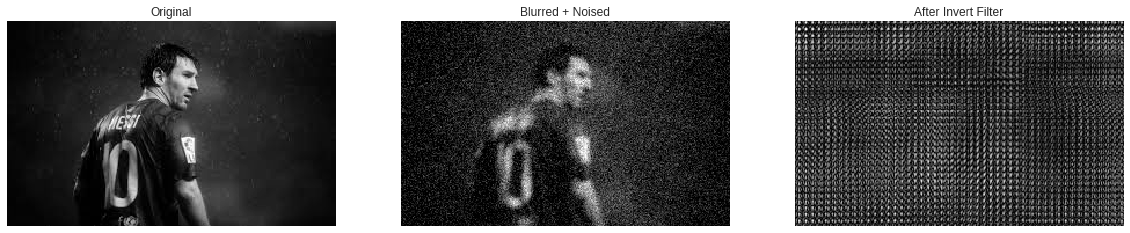

In [0]:
denoise_Invert_img = InvertFilter(noise,filter_blur)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(noise, cmap='gray'),plt.title('Blurred + Noised')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(denoise_Invert_img, cmap='gray'),plt.title('After Invert Filter')
plt.xticks([]), plt.yticks([])
plt.show()

best_invert = denoise_Invert_img

2. What is the problem with the Inverse Filter? How can this be solved?

```
# Insert your answer here
```
We can have zeros in the H filter, therefore, infinite value is obtained in the inverse filter, therefore maximum noise.

### Part 2 - Pseudo Inverse Filter

1. Test the restoration with the Pseudo Inverse Filter for deblurring and denoising

In [0]:
def PseudoInvertFilter(noise_img, filter_blur, epsilon=0.98):
    # Paste your implementaion of Pseudo Inverse Filter here
    [m,n]=noise_img.shape
    
    #we know H, and find its inverse
    H=np.fft.fft2(filter_blur,s=[m,n])
    PsuedoInverseH=np.zeros((m,n))
    
    #find the spectrum of the noise
    noisefft=np.fft.fft2(noise_img)
    
    #filling the psuedo matrix
    for i in range(m):
        for j in range(n):
            if(abs(H[i,j])>epsilon):
                PsuedoInverseH[i,j]=1/H[i, j]
                
    #calculate the transformed image, after using psuedo inverse filter
    img_after_psuedo_filter=PsuedoInverseH*noisefft
    return np.abs(np.fft.ifft2(img_after_psuedo_filter))
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


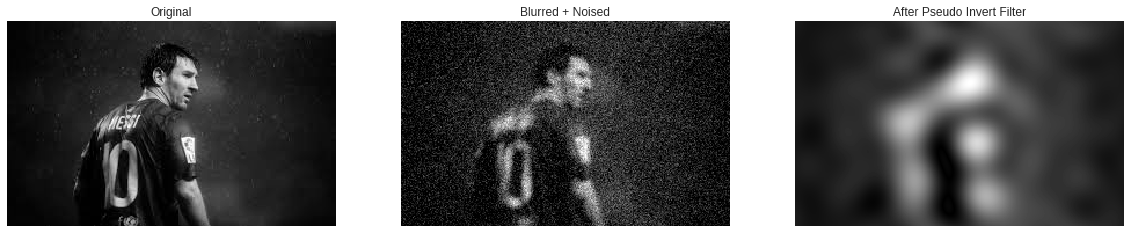

In [0]:
denoise_pseudo_img = PseudoInvertFilter(noise,filter_blur)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(noise, cmap='gray'),plt.title('Blurred + Noised')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(denoise_pseudo_img, cmap='gray'),plt.title('After Pseudo Invert Filter')
plt.xticks([]), plt.yticks([])
plt.show()

The Root Mean Square (RMS) error of restoration is defined in the following way:
\begin{equation*}
RMS = \left( \frac{1}{MN}  \sum_{k=0}^{M-1} \sum_{k=0}^{N-1} (\hat{f}(i,j)-f(i,j))^2 \right)^{0.5}
\end{equation*}

where $f(i, j)$ is the original image, $\hat{f}(i,j)$ is the restored image and $M \times N$ is the size of both images. 


2. Plot the graph of the RMS error (Y axis) versus the parameter $\epsilon$(X axis) and __Show the result of the best restoration.__

(the variance of the noise $\sigma _n ^2$ is fixed to the default value in the supplied program).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


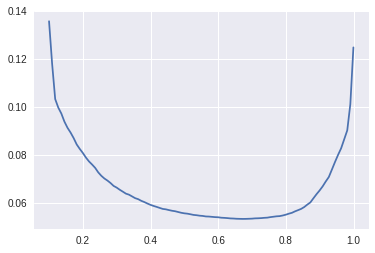

Best epsilon value = 0.6720909090909091
Best RMS for this epsilon = 0.0532679873281409


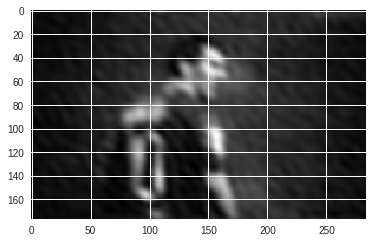

In [0]:
# Insert your code here
epsilon_values = np.linspace(0.1, 0.999, num=100)
RMS_values = np.zeros(100)
[m,n]=img.shape

for k, epsilon in enumerate(epsilon_values):
  denoise_pseudo_img = PseudoInvertFilter(noise,filter_blur, epsilon=epsilon)
  RMS = 0
  for i in range(m):
    for j in range(n):
      RMS = RMS + (denoise_pseudo_img[i,j] - img[i,j])**2
  RMS = RMS/(m*n)
  RMS = RMS**(0.5)
  RMS_values[k] = RMS
plt.plot(epsilon_values, RMS_values)
plt.show()
best_epsilon = epsilon_values[int((np.argmin(RMS_values)))]
print("Best epsilon value =", best_epsilon)
print("Best RMS for this epsilon =", RMS_values[int((np.argmin(RMS_values)))])

plt.imshow(PseudoInvertFilter(noise,filter_blur, epsilon=best_epsilon), cmap='gray')

best_pseudo_invert = PseudoInvertFilter(noise,filter_blur, epsilon=best_epsilon)

3.Now fix the parameter $\epsilon = 0.5$.
Plot the graph of the Root Mean Square (RMS) error of restoration (Y axis) versus the
variance of the noise $\sigma_n^2$ (X axis).
__Show the result of the best restoration__

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


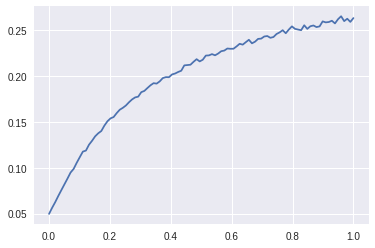

Best variance value = 1e-05
Best RMS for this epsilon = 0.04965445328643172


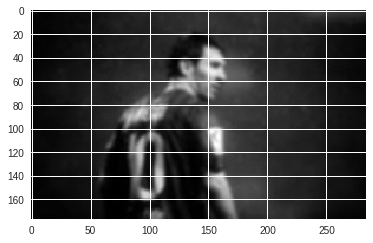

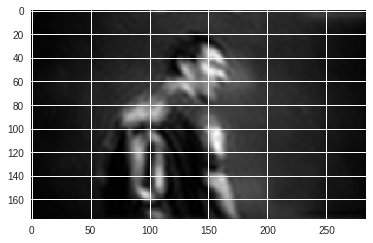

In [0]:
# Insert your code here

variance_values = np.linspace(0.00001, 1, 100)
RMS_values = np.zeros(100)
[m,n]=img.shape

for k, variance in enumerate(variance_values):
  blurred, new_noise = AddBlurreAndNoise(img, filter_blur, var=variance)
  denoise_pseudo_img = PseudoInvertFilter(new_noise,filter_blur, epsilon=0.5)
  
  RMS = 0
  for i in range(m):
    for j in range(n):
      RMS = RMS + (denoise_pseudo_img[i,j] - img[i,j])**2
  RMS = RMS/(m*n)
  RMS = RMS**(0.5)
  RMS_values[k] = RMS
    

plt.plot(variance_values, RMS_values)
plt.show()
best_variance = variance_values[int((np.argmin(RMS_values)))]
print("Best variance value =", best_variance)
print("Best RMS for this epsilon =", RMS_values[int((np.argmin(RMS_values)))])

blurred, new_noise = AddBlurreAndNoise(img, filter_blur, var=best_variance)
plt.imshow(new_noise, cmap='gray')
plt.show()
plt.imshow(PseudoInvertFilter(new_noise,filter_blur, epsilon=0.5), cmap='gray')
plt.show()

   3.1. For what maximal value of the variance of noise you still get an acceptable restoration?

```
# Insert your answer here
```
We can see that at variance = 0.2 we get a very noised image, and can barely understand what's in the image. (MESSI IS THE GOAT).
Below we plotted the restored image for this variance value.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


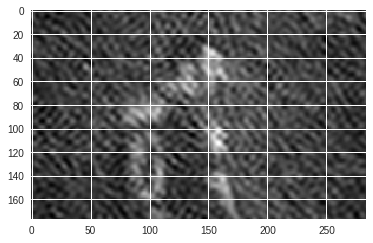

In [0]:
blurred, new_noise = AddBlurreAndNoise(img, filter_blur, var=0.2)
denoise_pseudo_img = PseudoInvertFilter(new_noise,filter_blur, epsilon=0.5)
plt.imshow(denoise_pseudo_img, cmap='gray')
plt.show()

### Part 3 - Wiener Filter

1. Test the restoration with the Wiener Filter for deblurring and denoising

Assume that the variance used in the Wiener filter formula is equal to the variance of the noise $\sigma_n^2$
, and both of them are equal to 0.01 (for image in a range of 0-1) or 0.01 ∗ 255
(for image in a range of 0-255).

In [0]:
def WienerFilter(noise_img,filter_blur,sigma=0.01, alpha=0.095):
    # Paste your implementaion of Wiener Filter here
    [m,n]=img.shape
    
    #we know H, and find its inverse
    H=np.fft.fft2(filter_blur,s=[m,n])
    
    #find the spectrum of the noise
    noisefft=np.fft.fft2(noise_img)
    
    #paramters for filter
    k=0.01
    
    x= np.linspace(-m/2,m/2,m)
    y= np.linspace(-n/2,n/2,n)
    
    u,v= np.meshgrid(y,x)
    
    #creating the wiener filter:
    
    WienerH= np.conj(H)/(abs(H)**2+(sigma*alpha)*(u**2+v**2))
    
     #calculate the transformed image, after using wiener filter
    img_after_wiener_filter=WienerH*noisefft
    return np.abs(np.fft.ifft2(img_after_wiener_filter))

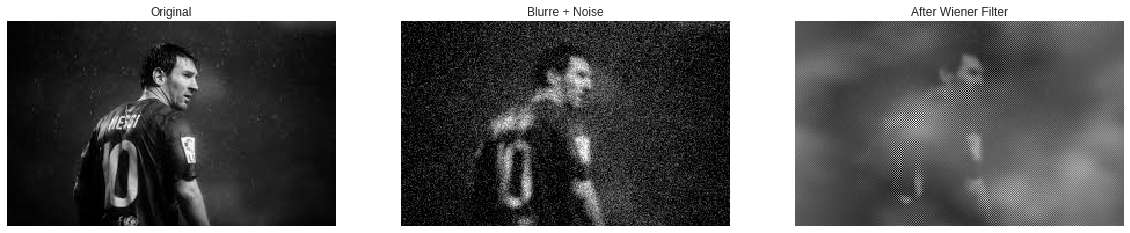

In [0]:
denoise_wiener_img = WienerFilter(noise,filter_blur)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(noise, cmap='gray'),plt.title('Blurre + Noise')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(denoise_wiener_img, cmap='gray'),plt.title('After Wiener Filter')
plt.xticks([]), plt.yticks([])
plt.show()

2. Plot the graph of the Root Mean Square (RMS) error of restoration (Y axis) versus the parameter $\sigma_n^2$ (X axis) (change $\sigma_n$ only in the filter, the noise stay the same, also no need to change alpha). __Show the result of the best restoration.__

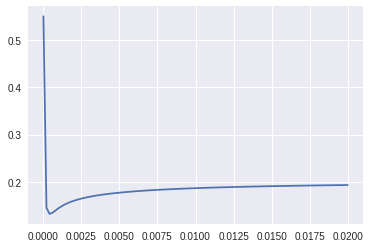

Best sigma value = 0.0004138383838383839
Best RMS for this sigma = 0.1324812339976015


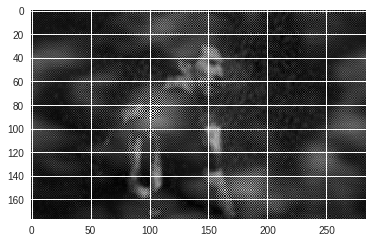

In [0]:
# Insert your code here

sigma_values = np.linspace(0.00001, 0.02, 100)
RMS_values = np.zeros(100)
[m,n]=img.shape

for k, sigma in enumerate(sigma_values):
  denoise_weiner_img = WienerFilter(noise,filter_blur, sigma=sigma)
  RMS = 0
  for i in range(m):
    for j in range(n):
      RMS = RMS + (denoise_weiner_img[i,j] - img[i,j])**2
  RMS = RMS/(m*n)
  RMS = RMS**(0.5)
  RMS_values[k] = RMS
  
plt.plot(sigma_values, RMS_values)
plt.show()
best_sigma = sigma_values[int((np.argmin(RMS_values)))]
print("Best sigma value =", best_sigma)
print("Best RMS for this sigma =", RMS_values[int((np.argmin(RMS_values)))])

plt.imshow(WienerFilter(noise,filter_blur, sigma=best_sigma), cmap='gray')
best_wiener = WienerFilter(noise,filter_blur, sigma=best_sigma)

### Part 4 - Deep learning (DnCNN)

1. After using a few filters to restoration the image, Lets try with the new approach **Deep learning** and compare the results

For building the neural network we will use the [PyTorch framwork](https://pytorch.org/) 

Because of lack of time we aren't going to train the network here.
We will use a pretrained model

In [0]:
# installing pytorch on remote computer:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

tcmalloc: large alloc 1073750016 bytes == 0x58490000 @  0x7ffbd73ac2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


Few more imports for using pytorch:

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable

Now we will define the architecture of the neural network.

We will implement the [DnCNN](http://www4.comp.polyu.edu.hk/~cslzhang/paper/DnCNN.pdf) architecture:

![DnCNN architecture](https://raw.github.com/cszn/DnCNN/master/figs/dncnn.png)

Has you can see the architecture is a class that inherit from nn.Module (pytorch module) 

In [0]:
class DnCNN(nn.Module):
    def __init__(self, channels, num_of_layers=17):
        super(DnCNN, self).__init__()
        kernel_size = 3
        padding = 1
        features = 64
        layers = []
        # first layer: conv2d -> Relu (for activation) :
        layers.append(nn.Conv2d(in_channels=channels, out_channels=features, kernel_size=kernel_size, padding=padding, bias=False))
        layers.append(nn.ReLU(inplace=True))
        # then lets defined all the other hidden layer as: conv2d -> BatchNorm -> Relu
        for _ in range(num_of_layers-2):
            layers.append(nn.Conv2d(in_channels=features, out_channels=features, kernel_size=kernel_size, padding=padding, bias=False))
            layers.append(nn.BatchNorm2d(features))
            layers.append(nn.ReLU(inplace=True))
        # and at the end: need to get back the image so conv2d with out_channels as in the original image:
        layers.append(nn.Conv2d(in_channels=features, out_channels=channels, kernel_size=kernel_size, padding=padding, bias=False))
        # insert all the layers in to Sequential that will pass the data in order
        self.dncnn = nn.Sequential(*layers)
        
    def forward(self, x):
        # defined the forward pass of our network
        out = self.dncnn(x)
        return out


lets pay attention that we don't need to defined the back propagation as the the Pytorch framework will do it for us.

After build the network architecture we need to load the pretrained model and insert the noisy image to it:

In [0]:
def DnCNN_network(noise_img, num_of_layers=17, model_path='net.pth'):
    
    print('Loading model ...')
    # defined the network, use the class we create above
    net = DnCNN(channels=1, num_of_layers=num_of_layers)
    traind_model = nn.DataParallel(net)
    # load pretrain model
    pretraind = torch.load(model_path)
    # get the state of the model (weights + baises ...)
    traind_model.load_state_dict(pretraind)
    traind_model.double()
    # say to pytorch that we juist want to test the model (not tarin it)
    traind_model.eval()
    print('Loaded\n')
    # Expend dim for using the network:
    noise_img = np.expand_dims(noise_img, 0) # batch dim
    noise_img = np.expand_dims(noise_img, 1) # channels dim
    # cast to tensor variable 
    noise_img = torch.DoubleTensor(noise_img)
    INoisy = Variable(noise_img)
    
    with torch.no_grad(): # this can save much memory
        print("Inserting the noisy image...\n")
        the_noise_that_we_learned = traind_model(INoisy)
        plt.imshow(the_noise_that_we_learned.squeeze(), cmap='gray'),plt.title('The noise that the network predict')
        plt.show()
        Out = torch.clamp(INoisy.cpu() - the_noise_that_we_learned.cpu(), 0., 1.)
    return Out.squeeze()



Explain the following line in the code. Why are we need this line? 
```
Out = torch.clamp(INoisy.cpu() - the_noise_that_we_learned.cpu(), 0., 1.)
```

```
# Insert your answer here
```
The torch.clamp function Clamps all elements in input into the range [0, 1] and return a resulting tensor such that all values smaller than 0 become 0 and all values bigger than 1 become 1.
INoisy is the noised image and the_noise_that_we_learned is the output of the NN. When substracting the noise that the network learned from the given image we excpect to get the reconstructed image, and that's why we clamp the values between zero and one (so all values are valid to be in the picture).

Now lets use the neural network and show the results:

Loading model ...
Loaded

Inserting the noisy image...



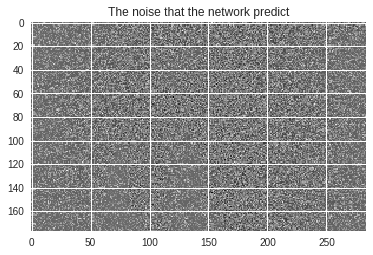

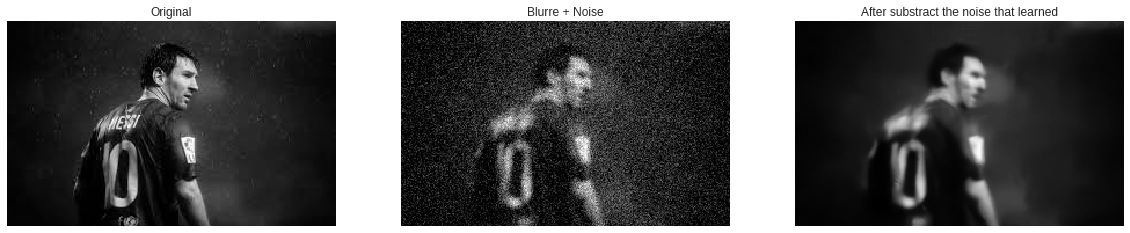

In [0]:
denoise_dncnn_img = DnCNN_network(noise)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) 
plt.subplot(132),plt.imshow(noise, cmap='gray'),plt.title('Blurre + Noise')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(denoise_dncnn_img, cmap='gray'),plt.title('After substract the noise that learned')
plt.xticks([]), plt.yticks([])
plt.show()

best_deep = denoise_dncnn_img

2. Lets compare the results from all the methods that we used in this lab:

   Show the best image after restoration from all the methods and calculate the RMS for every image that you show:

In [0]:
def calculateRMS(img, restored_img):
  [m,n]=img.shape
  
  RMS = 0
  for i in range(m):
    for j in range(n):
      RMS = RMS + (restored_img[i,j] - img[i,j])**2
  RMS = RMS/(m*n)
  RMS = RMS**(0.5)
  
  return RMS

Regular invert filter:
RMS = 381.4611984551033


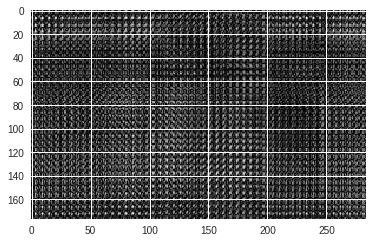

Pseudo invert filter:
RMS = 0.0532679873281409


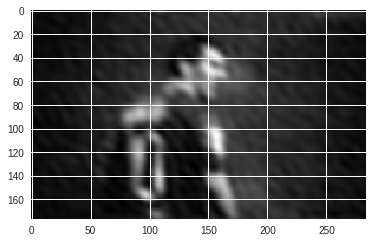

Wiener invert filter:
RMS = 0.1324812339976015


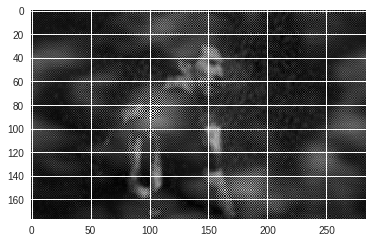

Deep learning:
RMS = tensor(0.0442, dtype=torch.float64)


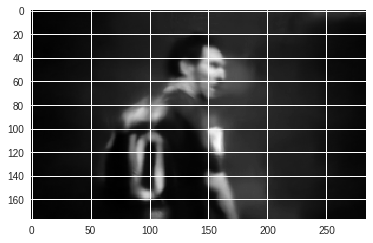

In [0]:
# Insert your code here
print("Regular invert filter:\nRMS =", calculateRMS(img,best_invert))
plt.imshow(best_invert, cmap='gray')
plt.show()

print("Pseudo invert filter:\nRMS =", calculateRMS(img,best_pseudo_invert))
plt.imshow(best_pseudo_invert, cmap='gray')
plt.show()

print("Wiener invert filter:\nRMS =", calculateRMS(img,best_wiener))
plt.imshow(best_wiener, cmap='gray')
plt.show()

print("Deep learning:\nRMS =", calculateRMS(img,best_deep))
plt.imshow(best_deep, cmap='gray')
plt.show()

In [0]:
Explian your results:

```
# Insert your answer here
```
As expected the invert filter gives poor result since it has division by zero.
For pseudo invert we get a better reconstruction but the image is very distorted.
The Wiener filter has some weird effects but it's a bit less distorted (except for the weird effects).
The Deep Learning reconstruction works well and gives the least noised image.